<a href="https://colab.research.google.com/github/Derinhelm/treebank_statistics/blob/v2/treebank_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data structure creating

In [1]:
class ConllEntry:
    def __init__(self, id, form, lemma, pos, cpos, feats=None, \
                 parent_id=None, relation=None,deps=None, misc=None):
        self.id = id
        self.form = form
        self.lemma = lemma
        self.pos = pos
        self.cpos = cpos
        self.feats = feats
        self.parent_id = parent_id
        self.relation = relation
        self.deps = deps
        self.misc = misc

In [2]:
class Sentence:
    def __init__(self):
        self.text = ""
        self.sent_id = ""
        self.tokens = []

    def add_token(self, token):
        self.tokens.append(token)

    def set_sent_id(self, sent_id):
        self.sent_id = sent_id

    def set_text(self, text):
        self.text = text

    def is_not_empty(self):
        return len(self.tokens) > 0


# Treebank data getting

In [3]:
import os

def get_treebank_file(path):
    get_command = f"wget -m {path}"
    print(get_command)
    os.system(get_command)
    download_path = "/content/" + path.replace("https://", "")
    itog_path = "/content/" + path.split("/")[-1]
    mv_command = f"mv {download_path} {itog_path}"
    print(mv_command)
    os.system(mv_command)
    return itog_path

In [4]:
class TreebankData:
    def __init__(self, train_files, dev_files, test_files):
        self.train = []
        for path in train_files:
            conll_path = get_treebank_file(path)
            self.train += self.read_conll(conll_path)

        self.dev = []
        for path in dev_files:
            conll_path = get_treebank_file(path)
            self.dev += self.read_conll(conll_path)

        self.test = []
        for path in test_files:
            conll_path = get_treebank_file(path)
            self.test += self.read_conll(conll_path)

    def read_conll(self, filename):
        fh = open(filename,'r',encoding='utf-8')
        sents_read = 0
        sents = []
        comments = set()

        sent = Sentence()
        for line in fh:
            tok = line.strip().split('\t')
            if not tok or line.strip() == '': # empty line, add sentence to list
                if sent.is_not_empty:
                    sents_read += 1
                    sents.append(sent)
                sent = Sentence()
            else:
                if line[0] == '#' or '-' in tok[0]: # a comment line
                    line = line.strip()
                    if line[:12] == "# sent_id = ":
                        sent.set_sent_id(line[12:])
                    elif line[:9] == "# text = ":
                        sent.set_text(line[9:])
                    else:
                        comments.add(line)

                else: # an actual ConllEntry, add to tokens
                    if tok[2] == "_":
                        tok[2] = tok[1].lower()

                    token = ConllEntry(*tok)
                    sent.add_token(token)
        fh.close()
        return sents


In [5]:
treebank_paths = { 'rus': ( [ "https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-a.conllu"
                            , "https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-b.conllu"
                            , "https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-c.conllu"]
                          , ["https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-dev.conllu"]
                          , ["https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-test.conllu"])
                 , 'ar': (["https://github.com/UniversalDependencies/UD_Arabic-PADT/raw/refs/heads/master/ar_padt-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Arabic-PADT/raw/refs/heads/master/ar_padt-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Arabic-PADT/raw/refs/heads/master/ar_padt-ud-test.conllu"])
                 , 'bdt': ( ["https://github.com/UniversalDependencies/UD_Basque-BDT/raw/refs/heads/master/eu_bdt-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Basque-BDT/raw/refs/heads/master/eu_bdt-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Basque-BDT/raw/refs/heads/master/eu_bdt-ud-test.conllu"])
                 , 'fi': ( ["https://github.com/UniversalDependencies/UD_Finnish-TDT/raw/refs/heads/master/fi_tdt-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Finnish-TDT/raw/refs/heads/master/fi_tdt-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Finnish-TDT/raw/refs/heads/master/fi_tdt-ud-test.conllu"])
                 , 'he': ( ["https://github.com/UniversalDependencies/UD_Hebrew-HTB/raw/refs/heads/master/he_htb-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Hebrew-HTB/raw/refs/heads/master/he_htb-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Hebrew-HTB/raw/refs/heads/master/he_htb-ud-test.conllu"])
                 , 'hi': ( ["https://github.com/UniversalDependencies/UD_Hindi-HDTB/raw/refs/heads/master/hi_hdtb-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Hindi-HDTB/raw/refs/heads/master/hi_hdtb-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Hindi-HDTB/raw/refs/heads/master/hi_hdtb-ud-test.conllu"])
                 , 'it': ( ["https://github.com/UniversalDependencies/UD_Italian-ISDT/raw/refs/heads/master/it_isdt-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Italian-ISDT/raw/refs/heads/master/it_isdt-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Italian-ISDT/raw/refs/heads/master/it_isdt-ud-test.conllu"])
                 , 'ja': ( ["https://github.com/UniversalDependencies/UD_Japanese-GSD/raw/refs/heads/master/ja_gsd-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Japanese-GSD/raw/refs/heads/master/ja_gsd-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Japanese-GSD/raw/refs/heads/master/ja_gsd-ud-test.conllu"])
                 , 'ko': ( ["https://github.com/UniversalDependencies/UD_Korean-GSD/raw/refs/heads/master/ko_gsd-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Korean-GSD/raw/refs/heads/master/ko_gsd-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Korean-GSD/raw/refs/heads/master/ko_gsd-ud-test.conllu"])
                 , 'sv': ( ["https://github.com/UniversalDependencies/UD_Swedish-Talbanken/raw/refs/heads/master/sv_talbanken-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Swedish-Talbanken/raw/refs/heads/master/sv_talbanken-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Swedish-Talbanken/raw/refs/heads/master/sv_talbanken-ud-test.conllu"])
                 , 'tr': ( ["https://github.com/UniversalDependencies/UD_Turkish-IMST/raw/refs/heads/master/tr_imst-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Turkish-IMST/raw/refs/heads/master/tr_imst-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_Turkish-IMST/raw/refs/heads/master/tr_imst-ud-test.conllu"])
                 , 'eng': (["https://github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-test.conllu"])
                 , 'chi': ( ["https://github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-train.conllu"]
                          , ["https://github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-dev.conllu"]
                          , ["https://github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-test.conllu"] )
                 }

In [6]:
treebanks = {}
for treebank_name, (train_files, dev_files, test_files) in treebank_paths.items():
    print(train_files, dev_files, test_files)
    treebanks[treebank_name] = TreebankData(train_files, dev_files, test_files)

['https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-a.conllu', 'https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-b.conllu', 'https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-c.conllu'] ['https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-dev.conllu'] ['https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-test.conllu']
wget -m https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-a.conllu
mv /content/github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-a.conllu /content/ru_syntagrus-ud-train-a.conllu
wget -m https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-b.conllu
mv /content/github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-trai

In [7]:
for treebank_name, treebank_data in treebanks.items():
    print(treebank_name, len(treebank_data.train), len(treebank_data.dev), len(treebank_data.test))

rus 69630 8906 8800
ar 6075 909 680
bdt 5396 1798 1799
fi 12217 1364 1555
he 5168 484 491
hi 13306 1659 1684
it 13121 564 482
ja 7050 507 543
ko 4400 950 989
sv 4303 504 1219
tr 3435 1100 1100
eng 12544 2001 2077
chi 3997 500 500


rus 69630 8906 8800

eng 12544 2001 2077

chi 3997 500 500


An ellipsis sentence contains a technical token whose index includes '.'

Such tokens must be deleted for the research

In [8]:
[(t.id, t.form) for t in treebanks['rus'].train[44].tokens]

[('1', '-'),
 ('2', 'Я'),
 ('2.1', '_'),
 ('3', 'насчет'),
 ('4', 'работы'),
 ('5', '…')]

In [9]:
def delete_point_tokens(s):
  s.tokens = [t for t in s.tokens if "." not in t.id]
  return s

sents = {}
for treebank_name, treebank_data in treebanks.items():
    lang_sents = treebank_data.train + \
                  treebank_data.dev + \
                  treebank_data.test
    sents[treebank_name] = [delete_point_tokens(s) for s in lang_sents]

In [12]:
[(t.id, t.form) for t in sents['rus'][44].tokens]

[('1', '-'), ('2', 'Я'), ('3', 'насчет'), ('4', 'работы'), ('5', '…')]

In [10]:
for treebank_name, treebank_data in sents.items():
    print(treebank_name, len(treebank_data))

rus 87336
ar 7664
bdt 8993
fi 15136
he 6143
hi 16649
it 14167
ja 8100
ko 6339
sv 6026
tr 5635
eng 16622
chi 4997


In [11]:
languages = sents.keys()
languages

dict_keys(['rus', 'ar', 'bdt', 'fi', 'he', 'hi', 'it', 'ja', 'ko', 'sv', 'tr', 'eng', 'chi'])

# Количество токенов в предложении

In [13]:
from collections import Counter

In [14]:
token_counters = {lang: Counter([len(s.tokens) for s in lang_sents]) for lang, lang_sents in sents.items()}

In [15]:
for lang, lang_counter in token_counters.items():
  print(lang, ". All token amount: ", sum([length * rate
                                           for length, rate in token_counters[lang].items()]), sep="")

rus. All token amount: 1515683
ar. All token amount: 282384
bdt. All token amount: 121443
fi. All token amount: 202192
he. All token amount: 160195
hi. All token amount: 351704
it. All token amount: 298338
ja. All token amount: 193654
ko. All token amount: 80322
sv. All token amount: 96820
tr. All token amount: 58096
eng. All token amount: 254822
chi. All token amount: 123291


rus. All token amount: 1474199

eng. All token amount: 253634

chi. All token amount: 123291

In [16]:
for lang, lang_counter in token_counters.items():
  print(lang, ". Average token amount: ", sum([token_amount * rate for token_amount, rate
                                               in lang_counter.items()]) / lang_counter.total(), sep="")

rus. Average token amount: 17.35461894293304
ar. Average token amount: 36.8455114822547
bdt. Average token amount: 13.504169909929946
fi. Average token amount: 13.358350951374208
he. Average token amount: 26.0776493569917
hi. Average token amount: 21.12463211003664
it. Average token amount: 21.058657443354274
ja. Average token amount: 23.907901234567902
ko. Average token amount: 12.671083767155702
sv. Average token amount: 16.06704281447063
tr. Average token amount: 10.309849157054126
eng. Average token amount: 15.330405486704368
chi. Average token amount: 24.673003802281368


rus. Average token amount: 17.227586126302995

eng. Average token amount: 15.295742371245929

chi. Average token amount: 24.673003802281368

In [17]:
for lang, token_counter in token_counters.items():
    lang_token_lengths = token_counter.keys()
    print(lang, ". The shortest sentence length: ", min(lang_token_lengths),
                ", the longest sentence length: ", max(lang_token_lengths), sep="")

rus. The shortest sentence length: 2, the longest sentence length: 205
ar. The shortest sentence length: 1, the longest sentence length: 398
bdt. The shortest sentence length: 3, the longest sentence length: 64
fi. The shortest sentence length: 1, the longest sentence length: 238
he. The shortest sentence length: 1, the longest sentence length: 117
hi. The shortest sentence length: 1, the longest sentence length: 116
it. The shortest sentence length: 1, the longest sentence length: 310
ja. The shortest sentence length: 2, the longest sentence length: 136
ko. The shortest sentence length: 2, the longest sentence length: 83
sv. The shortest sentence length: 1, the longest sentence length: 296
tr. The shortest sentence length: 1, the longest sentence length: 57
eng. The shortest sentence length: 1, the longest sentence length: 159
chi. The shortest sentence length: 4, the longest sentence length: 111


rus. The shortest sentence length: 2, the longest sentence length: 205

eng. The shortest sentence length: 1, the longest sentence length: 159

chi. The shortest sentence length: 4, the longest sentence length: 111

In [18]:
len_lang = {lang: t_counter.total() for lang, t_counter in token_counters.items()}

In [19]:
lang_russian_title = {'rus': 'русский', 'eng': 'английский', 'chi': 'китайский', 'ar': 'арабский', 'bdt': 'баскский',
                      'fi': 'финский', 'he': 'иврит', 'hi': 'хинди', 'it': 'итальянский', 'ja': 'японский',
                      'ko': 'корейский', 'sv': 'шведский', 'tr': 'турецкий'}

In [20]:
import matplotlib.pyplot as plt

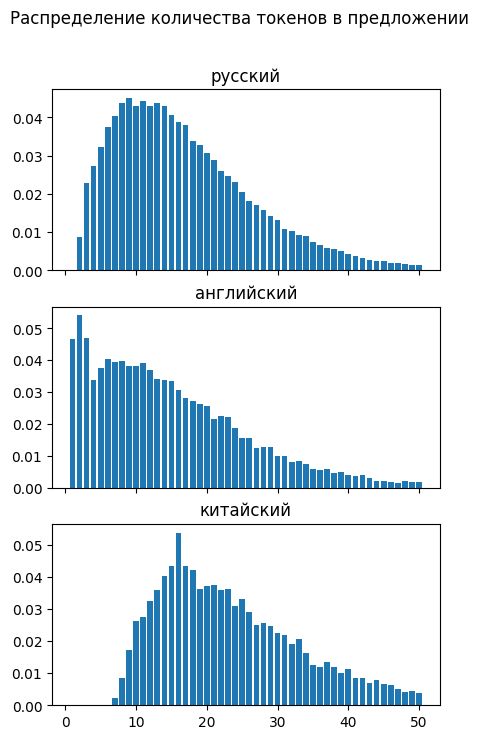

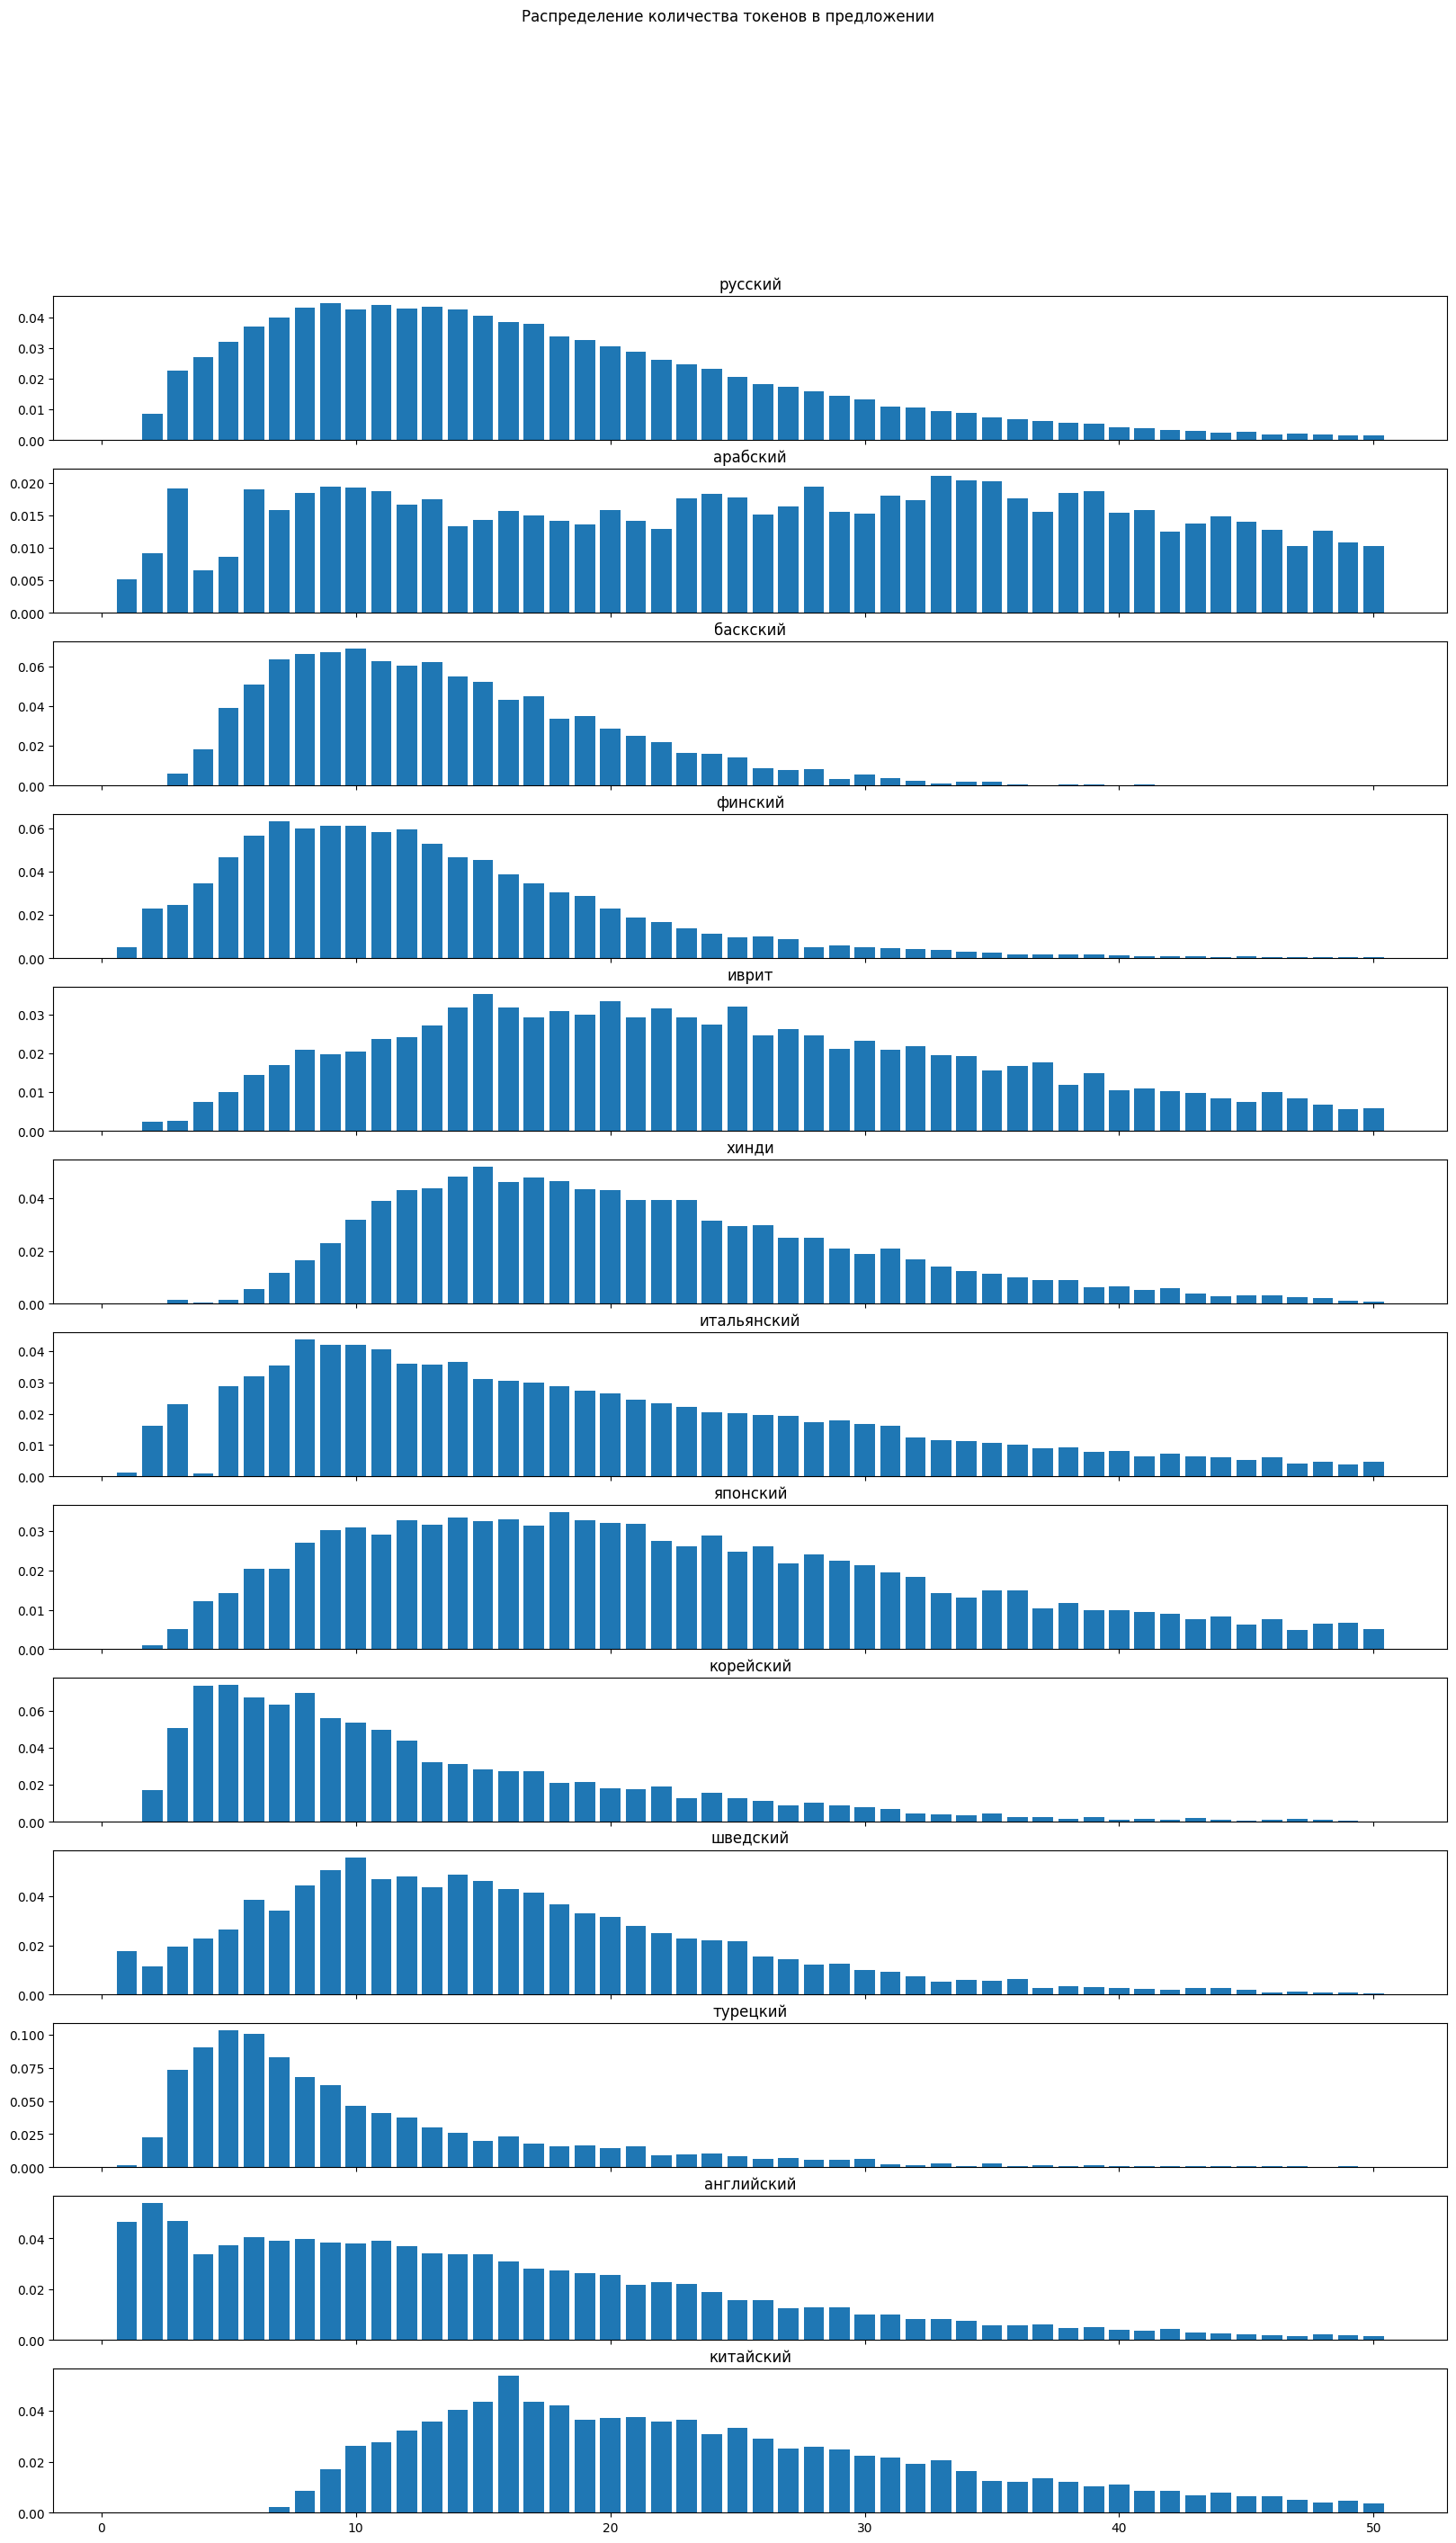

In [25]:
#define grid of plots
fig, axs = plt.subplots(nrows= len(sents) , ncols= 1, sharex=True, figsize=(20, 32))

#add title
fig.suptitle('Распределение количества токенов в предложении')

#add data to plots
for bar_i, lang in enumerate(token_counters):
  x, y = zip(*([(i, j / len_lang[lang]) for i, j in token_counters[lang].items() if i <= 50]))
  axs[bar_i].bar(x, height=y)
  axs[bar_i].title.set_text(lang_russian_title[lang])


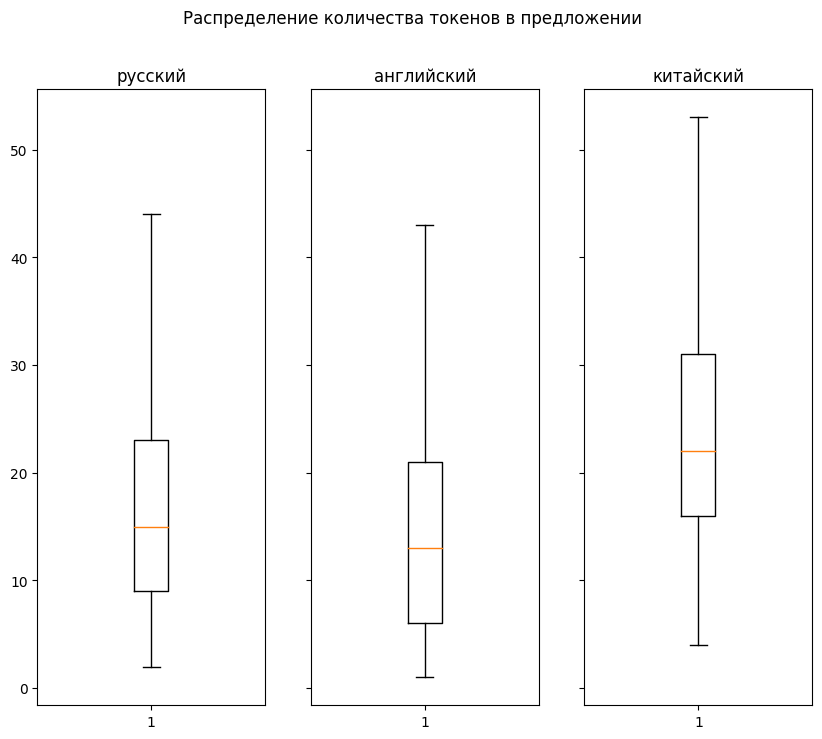

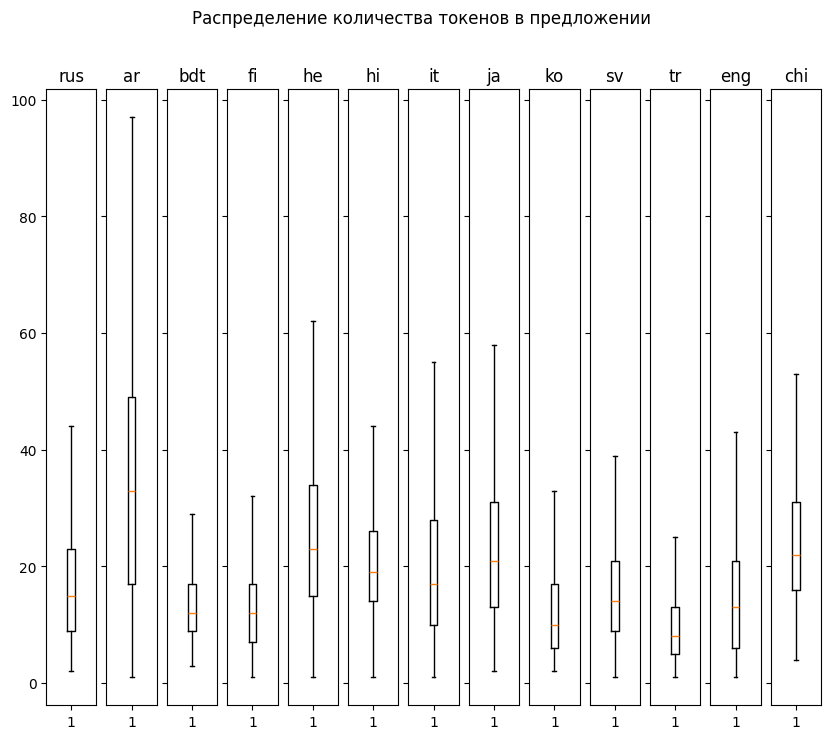

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=len(sents), figsize = (10,8), sharey=True)
fig.suptitle('Распределение количества токенов в предложении')

for col_i, lang in enumerate(token_counters):
    ax[col_i].boxplot(x=list(token_counters[lang].elements()), showfliers=False,showcaps=True)
    ax[col_i].title.set_text(lang)

plt.show()

In [23]:
for lang in languages:
  print(lang)
  print(round(sum([rate for token_amount, rate in token_counters[lang].items() if token_amount <= 10]) / len_lang[lang], 2), end = " ")
  print(round(sum([rate for token_amount, rate in token_counters[lang].items() if token_amount <= 20 and token_amount > 10])  / len_lang[lang], 2), end = " ")
  print(round(sum([rate for token_amount, rate in token_counters[lang].items() if token_amount <= 30 and token_amount > 20])  / len_lang[lang], 2), end = " ")
  print(round(sum([rate for token_amount, rate in token_counters[lang].items() if token_amount <= 40 and token_amount > 30])  / len_lang[lang], 2), end = " ")
  print(round(sum([rate for token_amount, rate in token_counters[lang].items() if token_amount <= 50 and token_amount > 40])  / len_lang[lang], 2), end = " ")
  print(round(sum([rate for token_amount, rate in token_counters[lang].items() if token_amount >= 50]) / len_lang[lang], 2))

rus
0.3 0.39 0.2 0.08 0.02 0.01
ar
0.14 0.16 0.16 0.18 0.13 0.24
bdt
0.38 0.48 0.13 0.01 0.0 0.0
fi
0.44 0.42 0.11 0.03 0.01 0.01
he
0.12 0.3 0.27 0.17 0.08 0.07
hi
0.09 0.45 0.3 0.12 0.03 0.01
it
0.27 0.32 0.2 0.11 0.05 0.05
ja
0.16 0.32 0.25 0.14 0.07 0.06
ko
0.53 0.3 0.13 0.03 0.01 0.0
sv
0.32 0.42 0.18 0.05 0.02 0.01
tr
0.65 0.24 0.08 0.02 0.01 0.0
eng
0.41 0.32 0.17 0.07 0.02 0.02
chi
0.05 0.39 0.3 0.15 0.06 0.04


rus
0.3 0.39 0.2 0.07 0.02 0.01

eng
0.42 0.32 0.16 0.07 0.02 0.02

chi
0.05 0.39 0.3 0.15 0.06 0.04


## Группировка датасетов по токенам

In [ ]:
import pandas as pd

In [ ]:
def create_node_df(cur_sents):
    info = []
    for sent_i, sent in enumerate(cur_sents):
      for w_i, w in enumerate(sent.tokens):
        info.append((w.id, w.parent_id, w.relation, w.pos, w.form, w.lemma, sent_i))
    info_df = pd.DataFrame(info, columns=["id", "parent_id", "relation", "pos", "form", "lemma", "sent_i"])
    return info_df

In [ ]:
node_df_dict = {}
for lang in sents:
    node_df_dict[lang] = create_node_df(sents[lang])

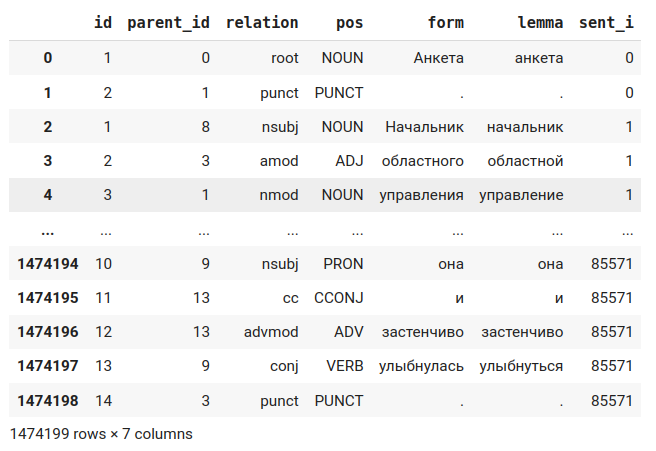

In [ ]:
node_df_dict['rus']

# Начальная форма

In [ ]:
for lang, node_df_lang in node_df_dict.items():
  print(lang, f"{len(set(node_df_dict[lang]['lemma'])) / len(node_df_dict[lang]):.2f}")

rus 0.04

eng 0.07

chi 0.16

# Часть речи

In [ ]:
from matplotlib_venn import venn3_unweighted, venn3_circles

pos_set = [set(node_df_dict[lang]['pos']) for lang in languages]

venn3_unweighted(pos_set,
      set_colors=('#ffffff', '#ffffff', '#ffffff'),
      set_labels = [lang_russian_title[lang] for lang in languages],
      alpha=0.75)
venn3_circles((1,1,1,1,1,1,1), lw=0.7)

plt.show()

In [ ]:
(set(node_df_dict['rus']['pos']) & set(node_df_dict['eng']['pos'])) - set(node_df_dict['chi']['pos'])

In [ ]:
relative_pos_rate = {}
for lang, node_df in node_df_dict.items():
  node_amount = len(node_df)
  relative_pos_rate[lang] = {i: j / node_amount for i, j in node_df.groupby('pos').size().items()}

In [ ]:
pos_df_list = []
pos_rows = []
for pos in relative_pos_rate['rus']:
  pos_df_list.append([relative_pos_rate[lang].get(pos, 0) for lang in languages])
  pos_rows.append(pos)
pos_df = pd.DataFrame(pos_df_list, pos_rows, languages)

In [ ]:
pos_df.round(4)

In [ ]:
for lang in languages:
    print(lang)
    print(pos_df[lang].sort_values(ascending=False)[:5].round(2))

# Тип связи

In [ ]:
for lang in languages:
  print(lang, len(set(node_df_dict[lang]['relation'])))

In [ ]:
from matplotlib_venn import venn3_unweighted, venn3_circles

relations_set = [set(node_df_dict[lang]['relation']) for lang in languages]

venn3_unweighted(relations_set,
      set_colors=('#ffffff', '#ffffff', '#ffffff'),
      set_labels = [lang_russian_title[lang] for lang in languages],
      alpha=0.75)
venn3_circles((1,1,1,1,1,1,1), lw=0.7)

plt.show()

In [ ]:
relative_relation_rate = {}
for lang, node_df in node_df_dict.items():
  node_amount = len(node_df)
  relative_relation_rate[lang] = {i: (j / node_amount) for i, j in node_df.groupby('relation').size().items()}

In [ ]:
relation_set = {r for lang in languages for r in relative_relation_rate[lang]}

In [ ]:
relation_df_list = []
relation_rows = list(relation_set)
for relation in relation_rows:
  relation_df_list.append([relative_relation_rate[lang].get(relation) for lang in languages])
relation_df = pd.DataFrame(relation_df_list, relation_rows, languages)

In [ ]:
for lang in languages:
    print(lang)
    print(relation_df[lang].sort_values(ascending=False)[:5].round(2))

In [ ]:
[relation_df[lang] > 0.001 for lang in languages][0]

In [ ]:
relation_df[((relation_df['rus'] > 0.05) | (relation_df['eng'] > 0.05) | (relation_df['chi'] > 0.05))].round(3)

In [ ]:
pd.set_option('display.max_rows', None)
relation_df.round(6)